# Courts & Rinks
## Cynthia Maz; clm245@pitt.edu

As part of our investigation into third spaces in Pittsburgh, I looked at public activity spaces like basketball courts and rinks. These spaces are vital for building community across generations, as well as introducing children to sports and providing hubs for those passionate about staying active to gather.

First, I imported all the extensions I would need as well as the data I will be using.

In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
courts = pd.read_csv("Courts_Rinks.csv")

After this, I grouped everything by the neighborhood and used the "size" function so I could have a count of courts attached to each neighborhood. To make it a little neater, I sorted it by highest to lowest count.

In [2]:
num_courts = courts.groupby("neighborhood").size()
num_courts.sort_values(ascending=False)

neighborhood
Squirrel Hill South    26
Highland Park          20
Hazelwood              10
Beltzhoover             9
Brookline               9
                       ..
Perry South             1
Bon Air                 1
Upper Hill              1
Allentown               1
Middle Hill             1
Length: 63, dtype: int64

While this helps us understand what the counts are, it's a little hard to visualize, so here's the top 10 values in the form of a bar graph.

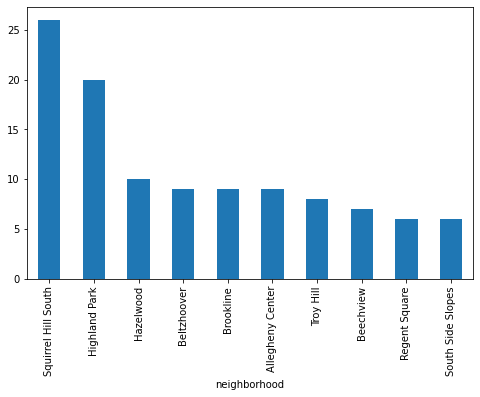

In [3]:
num_courts.sort_values(ascending=False).head(10).plot.bar(figsize=(8, 5))

From this graph, we can see that Squirrel Hill South and Highland Park have much higher counts than any other neighborhood, and it quickly decreases after that. While this shows us the top neighborhoods, it's difficult to see any trends throughout the city. So let's make a map!

Below I import the shape files for Pittsburgh neighborhoods, and merge it with the counts I made for the courts. Then, with a little geopandas magic, I made a heatmap of the neighborhoods that shows where the most courts are through a color gradient.

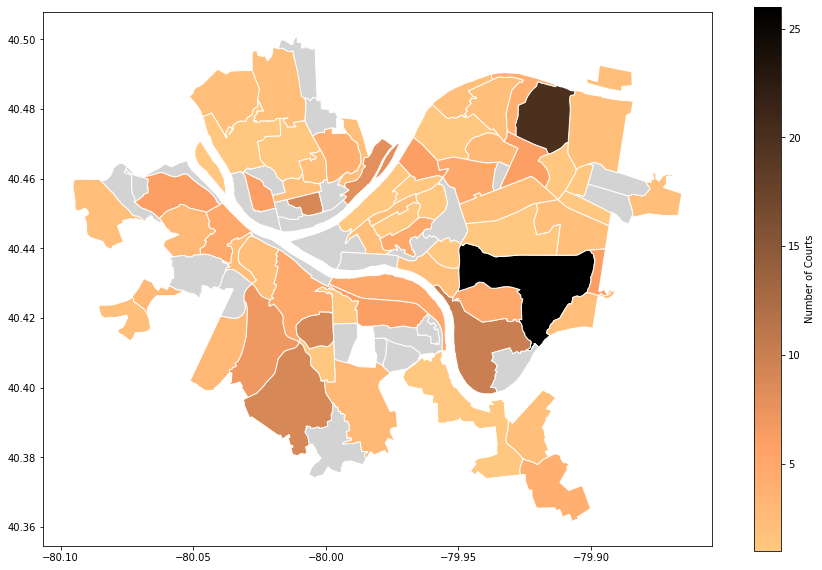

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
courts_map = neighborhoods.merge(num_courts.rename('courts'), how='left', left_on='hood', right_on='neighborhood')
courts_map.plot(column='courts', cmap='copper_r', edgecolor="white", legend=True,
legend_kwds={'label': "Number of Courts"},  figsize=(15, 10),  missing_kwds={"color": "lightgrey"} )

From this, we can see that in more urban areas, especially Downtown and North Shore, there are no courts at all, but numbers rise as neighborhoods become further away from these areas. This indicates that outdoor activity and community is not prioritized in the economic centers of the city.

Regardless, it is clear from the bar chart and the map that one neighborhood comes out on top.

# Squirrel Hill South is the top neighborhood for Courts & Rinks!